In [3]:
import numpy as np
import matplotlib.pyplot as plt

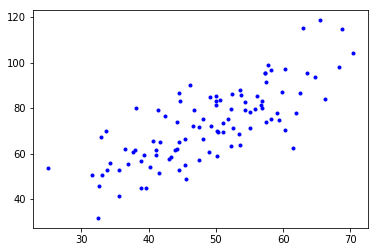

In [4]:
data = np.genfromtxt('../l1_data.csv', delimiter=',')
plt.plot(data[:,0], data[:, 1], 'b.')
plt.show()

In [5]:
def split_data(data):
    examples, features = data.shape
    return (data[0:, :features - 1], data[0:, features - 1])

def train(x, y, lr=0.0001, iter=15, rr=2):
    m, features = x.shape
    
    theta = np.zeros(features + 1)
    x_bias = np.column_stack((np.ones(m), x))
    print(x_bias.shape)
    print(theta.shape)
    print(y.shape)
    costs = []
    
    for i in range(iter):
        cost = (1 / (2 * m)) * np.sum((np.sum(np.transpose(theta)*x_bias, axis=1) - y) ** 2) + (rr / m)* np.sum(theta[1:] ** 2)
        costs = [*costs, cost]
        theta_update = theta - (
            lr * (1 / m) * np.sum((np.sum(np.transpose(theta) * x_bias, axis=1) - y) * np.transpose(x_bias), axis=1)
        )
        theta_regularization = (rr / m) * theta
        theta_regularization[0] = 0
        theta = theta_update + theta_regularization
        
    return theta, costs

def plot_data(data, predicted, costs):
    x, y = data
    fig, (g1, g2) = plt.subplots(nrows=2, ncols=1)
    g1.plot(x, y, 'bo', markersize=10)
    g1.plot(x, predicted, 'ro', markersize=2)
    g1.axis([x.min() - x.mean() / 10, x.max() + x.mean()/ 10, y.min() - y.mean()/ 10, y.max() + y.mean()/ 10])
    g2.plot(costs)
    plt.show() 
    
def predict(theta, x):
    m, features = x.shape
    x_bias = np.column_stack((np.ones(m), x))
    y = np.sum(np.transpose(theta) * x_bias, axis=1)
    return y

(100, 2)
(2,)
(100,)


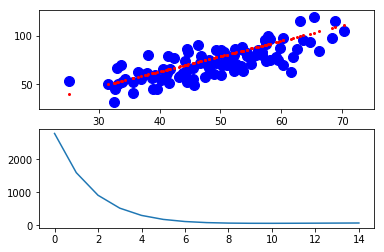

In [6]:
x, y = split_data(data)
theta, costs = train(x, y)
plot_data((x, y), predict(theta, x), costs)

In [7]:
arr = list()
for i in range(10):
    arr.append([i, (i) ** 2])
data_q = np.array(arr)

In [8]:
def normalize(a):
    return (a - a.min()) / (a.max() - a.min())

def trainq(x, y, lr=0.0001, iter=5000, rr=0):
    m, features = x.shape
    
    theta = np.zeros(features + 2)
    x_bias = np.column_stack((np.ones(m), x, np.power(x, 2)))
    costs = []
    one2m = 1 / (2 * m)
    
    for i in range(iter):
        t = np.dot(x_bias, theta.reshape((-1, 1)))
        cost = (1 / (2 * m)) * \
            np.dot( (t - y.reshape((-1, 1))).T, t - y.reshape((-1, 1)) ) \
            + (rr / (2*m))* np.sum(theta[1:] ** 2)
        costs = [*costs, cost.flatten()]
        theta_update = theta - (
            lr * (1 / m) * np.sum((np.sum(np.transpose(theta) * x_bias, axis=1) - y) * np.transpose(x_bias), axis=1)
        )
        theta_regularization = (rr / m) * theta
        theta_regularization[0] = 0
        theta = theta_update + theta_regularization
        
#         cost = (1 / (2 * m)) * np.sum((np.sum(np.transpose(theta)*x_bias, axis=1) - y) ** 2) + (rr / m)* np.sum(theta[1:] ** 2)
#         costs = [*costs, cost]
#         theta_update = theta - (
#             lr * (1 / m) * np.sum((np.sum(np.transpose(theta) * x_bias, axis=1) - y) * np.transpose(x_bias), axis=1)
#         )
#         theta_regularization = (rr / m) * theta
#         theta_regularization[0] = 0
#         theta = theta_update + theta_regularization
        
    return theta, costs

def predict_q(theta, x):
    m, features = x.shape
    x_bias = np.column_stack((np.ones(m), x, np.power(x, 2)))
    y = np.dot(theta.T, x_bias.T)
    return y

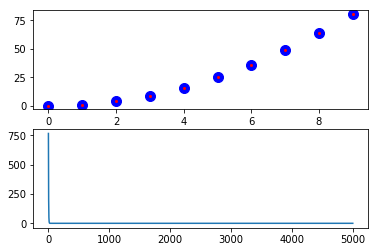

In [9]:
x, y = split_data(data_q)

theta, costs = trainq(x, y)
# print(theta, x)
plot_data((x, y), predict_q(theta, x), costs)